In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import cv2
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from tqdm import tqdm
from string import punctuation

#load mpnet class from .py file
from MPNETopic import MPNETopic

Read NPR News Articles with Title and Article Text

In [2]:
#load dataframe of news articles
text_df = pd.read_csv('./news_articles.csv')

#save stop words from sklearn
stop_words = ENGLISH_STOP_WORDS

Basic Text Cleaning

In [3]:
def clean_text(text):
    """
    Basic cleaning such as lowering text, removing stop words, and removing punctuation.
    """
    text = text.lower()
    text = text.split()
    text = [word for word in text if word not in stop_words]
    text = [word for word in text if word not in [char for char in punctuation]]
    text = ' '.join(text)
    return text

In [4]:
#apply cleaning function to article title
text_df['title_clean'] = [clean_text(txt) for txt in tqdm(text_df['title'])]

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:00<00:00, 58128.63it/s]


Word Frequency Plot

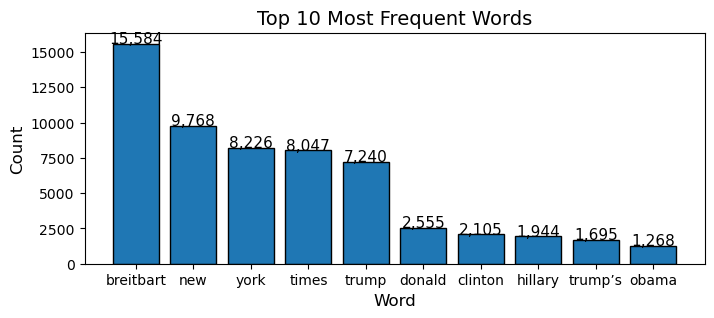

In [5]:
#word count frequency
word_counts = text_df['title_clean'].apply(lambda text: text.lower().split()).explode().value_counts()
plt.figure(figsize=(8, 3))
plt.bar(word_counts.index[:10], word_counts.values[:10], edgecolor='black')
plt.xlabel('Word', size=12)
plt.ylabel('Count', size=12)
plt.title('Top 10 Most Frequent Words', size=14)

for idx, val in enumerate(word_counts[:10]):
    plt.text(idx, val, f"{val:,}", ha='center', size=11)
plt.show()

Word Cloud

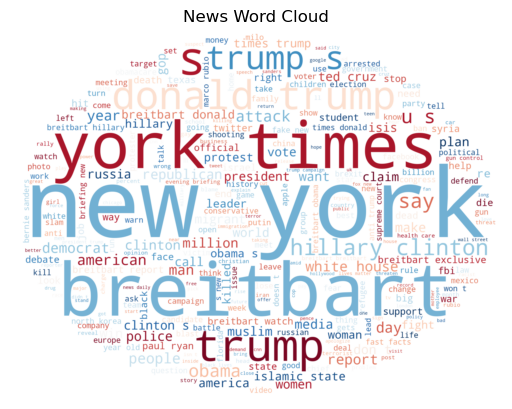

In [6]:
#load circle image for word cloud mask
im = cv2.imread('circle.jpg')
im = ~cv2.resize(im, (2160, 1620))

#join all text into one giant string
all_text = ' '.join(text_df['title_clean'])

# plt.figure(figsize=(10, 4))
wc = WordCloud(mask=im, colormap='RdBu', background_color='white',
               max_words=300, max_font_size=800, random_state=42)
wc.generate(all_text)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('News Word Cloud', size=12)
plt.show()

Topic Model Using Article Title

Average title word length: 59



Batches:   0%|          | 0/1563 [00:00<?, ?it/s]

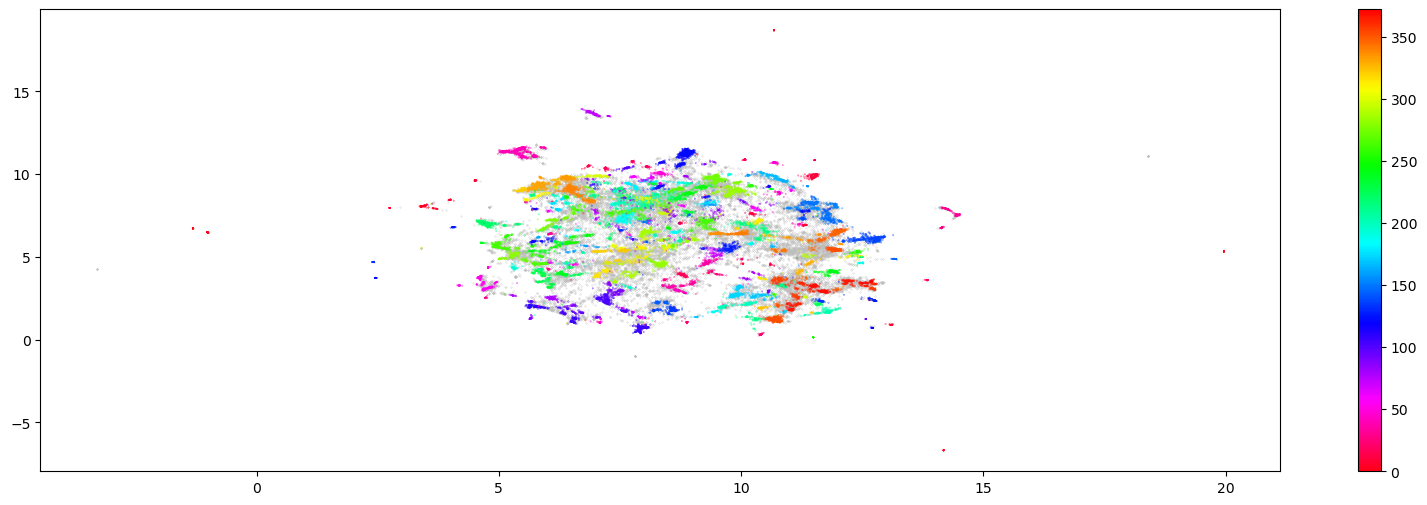

Initial Topic Amount: 374
Final Topic Amount: 374



In [7]:
#use mpnet topic to create our topic model and topics
column='title_clean'

topic_model = MPNETopic(text_df, column)
topic_df, topics = topic_model.create_topic_model()

In [ ]:
for topic in topics:
    print(topic)
    print(', '.join([tup[0] for tup in topics[topic]][:4]))
    print('*'*50)

-1
breitbart, new, trump, new york
**************************************************
0
cnn 10, 2017 cnn, 2017 cnn 10, 2017
**************************************************
1
cnn 10, 2017 cnn, 2017 cnn 10, 2017
**************************************************
2
2016 cnn, cnn student, student news, cnn student news
**************************************************
3
castro, cuba, fidel, fidel castro
**************************************************
4
puerto, puerto rico, rico, breitbart puerto rico
**************************************************
5
venezuela, breitbart venezuela, maduro, venezuelan
**************************************************
6
mark cuban, cuban, mark, breitbart mark cuban
**************************************************
7
maher, breitbart maher, maher trump, breitbart maher trump
**************************************************
8
manning, chelsea manning, chelsea, bergdahl
**************************************************
9
obama commutes, commutes, 